### 라이브러리 호출

In [ ]:
import pandas as pd
import numpy as np

from keras.preprocessing.image import ImageDataGenerator # 데이터 증강
from sklearn.model_selection import train_test_split

from keras import Sequential
from keras.layers import * 

import matplotlib.pyplot as plt

### 데이터 불러오기 

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/class/vision study/train.csv")
test = pd.read_csv("/content/drive/MyDrive/class/vision study/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/class/vision study/submission.csv")

### 데이터 구조 확인

In [ ]:
print(f"train data : {train.shape}")
print(f"test data : {test.shape}")
print(f"submission data : {sub.shape}")

train data : (2048, 787)
test data : (20480, 786)
submission data : (20480, 2)


### 전처리

In [ ]:
train2 = train.drop(["id", "digit", "letter"],1)
test2 = test.drop(["id", "letter"],1)

<ipython-input-3-220c0349a74a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train2 = train.drop(["id", "digit", "letter"],1)
<ipython-input-3-220c0349a74a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test2 = test.drop(["id", "letter"],1)


In [ ]:
train2 = train2.values.reshape(-1,28,28,1)
test2 = test2.values.reshape(-1,28,28,1)

### 정규화

In [ ]:
train2 = train2 / 255
test2 = test2 / 255

### 데이터 분리

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train2, train['digit'], test_size=0.2, random_state=42, stratify = train['digit'])

In [ ]:
idg = ImageDataGenerator(rotation_range = 45)
idg2 = ImageDataGenerator()

train_generator = idg.flow(x_train, y_train)
valid_generator = idg2.flow(x_valid, y_valid)
test_generator = idg2.flow(test2, shuffle = False)


In [ ]:
# for batch in train_generator:
#   x_batch, y_batch = batch
#   print("x_batch", x_batch)
#   print("y_batch", y_batch)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
reLR = ReduceLROnPlateau(monitor = "val_loss", patience=20,verbose=1,factor=0.5)
es = EarlyStopping(monitor = "val_loss", patience=30, verbose=1)
mc = ModelCheckpoint('best_cvision.h5', save_best_only=True, verbose=1) 

In [ ]:
model = Sequential()

model.add(Conv2D(128,activation='relu',input_shape=(28,28,1),kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,activation='relu',kernel_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,activation='relu',kernel_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,activation='relu',kernel_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    validation_data=(x_valid, y_valid),       
                   )

52/52 [==============================] - 5s 31ms/step - loss: 2.4418 - acc: 0.3370 - val_loss: 4.8925 - val_acc: 0.0976


### 학습

In [ ]:
train_generator
len(valid_generator)

0

In [ ]:
learning_history = model.fit(train_generator, validation_data=valid_generator, epochs=100, callbacks=[es,mc,reLR])

Epoch 1/100
62/64 [============================>.] - ETA: 0s - loss: 0.3790 - acc: 0.8800


Epoch 1: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3728 - acc: 0.8818 - lr: 2.5000e-04
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 0.3766 - acc: 0.8813


Epoch 2: saving model to best_civision.h5


KeyboardInterrupt: ignored

In [ ]:
hist = pd.DataFrame(learning_history.history)
hist['val_loss'].min()

0.7131170630455017

In [ ]:
hist.columns

### 시각화

In [ ]:
hist.head(60)

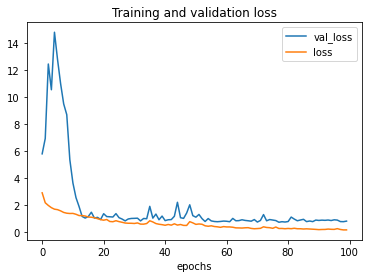

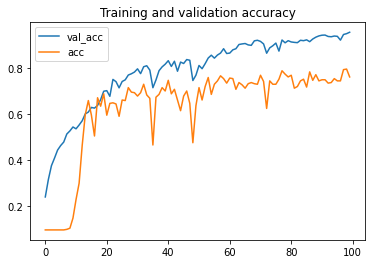

In [ ]:
plt.title('Training and validation loss')
plt.xlabel('epochs')

plt.plot(hist['val_loss'])
plt.plot(hist['loss'])
plt.legend(['val_loss','loss'])

plt.figure()

plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.legend(['val_acc','acc'])
plt.title('Training and validation accuracy')


plt.show()

In [ ]:
model.load_weights('best_cvision.h5')

In [ ]:
result = model.predict(test_generator, verbose=True)

640/640 [==============================] - 4s 6ms/step


In [ ]:
len(result)

20480

In [ ]:
result

array([[4.01005927e-05, 3.22068627e-05, 3.67013994e-03, ...,
        2.19748517e-06, 2.83507444e-03, 5.80343340e-06],
       [9.10215229e-02, 3.08337712e-06, 2.30459869e-03, ...,
        1.07009555e-05, 1.01437405e-01, 1.48676887e-01],
       [1.57449103e-03, 5.28699048e-02, 1.15417391e-01, ...,
        3.70955318e-02, 4.55710560e-01, 2.74854213e-01],
       ...,
       [8.34527193e-04, 1.34679885e-05, 2.96590908e-04, ...,
        3.86427189e-07, 2.37325112e-05, 3.05613135e-08],
       [1.71023631e-03, 4.45961922e-01, 6.78410754e-03, ...,
        1.01014460e-02, 2.72153150e-02, 7.00628310e-02],
       [9.72529411e-01, 5.94460062e-07, 1.11112641e-02, ...,
        1.18489220e-06, 1.52524823e-04, 1.10152928e-06]], dtype=float32)

In [ ]:
result.argmax(1)

array([6, 3, 8, ..., 6, 8, 0])

In [ ]:
sub

,id,digit
0,2049,6
1,2050,3
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits = 5, random_state = 42, shuffle = True)

In [ ]:
result = 0
for train_index, valid_index in skf.split(train2, train["digit"]) :
  mc = ModelCheckpoint("best_civision.h5", save_bst_only = True, verbose = 1)
  
  x_train = train2[train_index]
  x_valid = train2[valid_index]
  y_train = train["digit"][train_index]
  y_valid = train["digit"][valid_index]

  train_generator = idg.flow(x_train, y_train)
  valid_generator = idg2.flow(x_valid, y_valid)
  test_generator = idg2.flow(test2, shuffle = False)

  model2 = Sequential()

  model2.add(Conv2D(128,activation='relu',input_shape=(28,28,1),kernel_size=(5,5), padding='same'))
  model2.add(BatchNormalization())
  model2.add(Conv2D(128,activation='relu',kernel_size=(2,2), padding='same'))
  model2.add(BatchNormalization())
  model2.add(MaxPooling2D((2,2)))
  model2.add(Dropout(0.3))

  model2.add(Conv2D(256,activation='relu',kernel_size=(2,2), padding='same'))
  model2.add(BatchNormalization())
  model2.add(Conv2D(256,activation='relu',kernel_size=(2,2), padding='same'))
  model2.add(BatchNormalization())
  model2.add(MaxPooling2D((2,2)))
  model2.add(Dropout(0.3))

  model2.add(Flatten())

  model2.add(Dense(1000,activation='relu'))
  model2.add(BatchNormalization())
  model2.add(Dropout(0.5))

  model2.add(Dense(10,activation='softmax'))

  model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
  
  learning_history = model2.fit(train_generator, epochs = 100, validation_data = valid_generator, callbacks = [es,mc,reLR])

  model2.load_weights('best_cvision.h5')
  result += model2.predict(test_generator,verbose=True)/5


Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 2.7828 - acc: 0.2446


Epoch 1: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 2.7828 - acc: 0.2446 - lr: 0.0010
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 2.0623 - acc: 0.3350


Epoch 2: saving model to best_civision.h5


64/64 [==============================] - 2s 36ms/step - loss: 2.0623 - acc: 0.3350 - lr: 0.0010
Epoch 3/100
63/64 [============================>.] - ETA: 0s - loss: 1.9030 - acc: 0.3844


Epoch 3: saving model to best_civision.h5


64/64 [==============================] - 2s 33ms/step - loss: 1.9059 - acc: 0.3833 - lr: 0.0010
Epoch 4/100
64/64 [==============================] - ETA: 0s - loss: 1.7693 - acc: 0.4111


Epoch 4: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.7693 - acc: 0.4111 - lr: 0.0010
Epoch 5/100
64/64 [==============================] - ETA: 0s - loss: 1.6252 - acc: 0.4463


Epoch 5: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.6252 - acc: 0.4463 - lr: 0.0010
Epoch 6/100
64/64 [==============================] - ETA: 0s - loss: 1.5424 - acc: 0.4795


Epoch 6: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.5424 - acc: 0.4795 - lr: 0.0010
Epoch 7/100
64/64 [==============================] - ETA: 0s - loss: 1.4684 - acc: 0.5093


Epoch 7: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.4684 - acc: 0.5093 - lr: 0.0010
Epoch 8/100
64/64 [==============================] - ETA: 0s - loss: 1.3526 - acc: 0.5356


Epoch 8: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.3526 - acc: 0.5356 - lr: 0.0010
Epoch 9/100
64/64 [==============================] - ETA: 0s - loss: 1.2791 - acc: 0.5518


Epoch 9: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.2791 - acc: 0.5518 - lr: 0.0010
Epoch 10/100
64/64 [==============================] - ETA: 0s - loss: 1.2954 - acc: 0.5537


Epoch 10: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.2954 - acc: 0.5537 - lr: 0.0010
Epoch 11/100
64/64 [==============================] - ETA: 0s - loss: 1.2240 - acc: 0.5786


Epoch 11: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.2240 - acc: 0.5786 - lr: 0.0010
Epoch 12/100
64/64 [==============================] - ETA: 0s - loss: 1.1734 - acc: 0.6064


Epoch 12: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.1734 - acc: 0.6064 - lr: 0.0010
Epoch 13/100
64/64 [==============================] - ETA: 0s - loss: 1.0552 - acc: 0.6323


Epoch 13: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 1.0552 - acc: 0.6323 - lr: 0.0010
Epoch 14/100
64/64 [==============================] - ETA: 0s - loss: 0.9887 - acc: 0.6675


Epoch 14: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.9887 - acc: 0.6675 - lr: 0.0010
Epoch 15/100
64/64 [==============================] - ETA: 0s - loss: 0.9673 - acc: 0.6724


Epoch 15: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.9673 - acc: 0.6724 - lr: 0.0010
Epoch 16/100
64/64 [==============================] - ETA: 0s - loss: 0.9338 - acc: 0.7007


Epoch 16: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.9338 - acc: 0.7007 - lr: 0.0010
Epoch 17/100
64/64 [==============================] - ETA: 0s - loss: 0.8935 - acc: 0.6934


Epoch 17: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.8935 - acc: 0.6934 - lr: 0.0010
Epoch 18/100
64/64 [==============================] - ETA: 0s - loss: 0.8712 - acc: 0.6997


Epoch 18: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.8712 - acc: 0.6997 - lr: 0.0010
Epoch 19/100
64/64 [==============================] - ETA: 0s - loss: 0.8988 - acc: 0.6938


Epoch 19: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.8988 - acc: 0.6938 - lr: 0.0010
Epoch 20/100
64/64 [==============================] - ETA: 0s - loss: 0.8405 - acc: 0.7134


Epoch 20: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.8405 - acc: 0.7134 - lr: 0.0010
Epoch 21/100
64/64 [==============================] - ETA: 0s - loss: 0.8365 - acc: 0.7251


Epoch 21: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.8365 - acc: 0.7251 - lr: 0.0010
Epoch 22/100
64/64 [==============================] - ETA: 0s - loss: 0.9276 - acc: 0.6802


Epoch 22: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.9276 - acc: 0.6802 - lr: 0.0010
Epoch 23/100
64/64 [==============================] - ETA: 0s - loss: 0.8079 - acc: 0.7285


Epoch 23: saving model to best_civision.h5


64/64 [==============================] - 3s 39ms/step - loss: 0.8079 - acc: 0.7285 - lr: 0.0010
Epoch 24/100
63/64 [============================>.] - ETA: 0s - loss: 0.7432 - acc: 0.7436


Epoch 24: saving model to best_civision.h5


64/64 [==============================] - 2s 37ms/step - loss: 0.7474 - acc: 0.7441 - lr: 0.0010
Epoch 25/100
63/64 [============================>.] - ETA: 0s - loss: 0.7193 - acc: 0.7599


Epoch 25: saving model to best_civision.h5


64/64 [==============================] - 2s 31ms/step - loss: 0.7219 - acc: 0.7593 - lr: 0.0010
Epoch 26/100
64/64 [==============================] - ETA: 0s - loss: 0.6831 - acc: 0.7632


Epoch 26: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6831 - acc: 0.7632 - lr: 0.0010
Epoch 27/100
63/64 [============================>.] - ETA: 0s - loss: 0.6339 - acc: 0.7827


Epoch 27: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6324 - acc: 0.7832 - lr: 0.0010
Epoch 28/100
64/64 [==============================] - ETA: 0s - loss: 0.6726 - acc: 0.7622


Epoch 28: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6726 - acc: 0.7622 - lr: 0.0010
Epoch 29/100
64/64 [==============================] - ETA: 0s - loss: 0.6383 - acc: 0.7837


Epoch 29: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6383 - acc: 0.7837 - lr: 0.0010
Epoch 30/100
64/64 [==============================] - ETA: 0s - loss: 0.6706 - acc: 0.7666


Epoch 30: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6706 - acc: 0.7666 - lr: 0.0010
Epoch 31/100
64/64 [==============================] - ETA: 0s - loss: 0.6227 - acc: 0.7847


Epoch 31: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6227 - acc: 0.7847 - lr: 0.0010
Epoch 32/100
64/64 [==============================] - ETA: 0s - loss: 0.6007 - acc: 0.7939


Epoch 32: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6007 - acc: 0.7939 - lr: 0.0010
Epoch 33/100
64/64 [==============================] - ETA: 0s - loss: 0.5987 - acc: 0.8018


Epoch 33: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5987 - acc: 0.8018 - lr: 0.0010
Epoch 34/100
64/64 [==============================] - ETA: 0s - loss: 0.5902 - acc: 0.7969


Epoch 34: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5902 - acc: 0.7969 - lr: 0.0010
Epoch 35/100
64/64 [==============================] - ETA: 0s - loss: 0.7137 - acc: 0.7607


Epoch 35: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.7137 - acc: 0.7607 - lr: 0.0010
Epoch 36/100
63/64 [============================>.] - ETA: 0s - loss: 0.6420 - acc: 0.7857


Epoch 36: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.6392 - acc: 0.7856 - lr: 0.0010
Epoch 37/100
64/64 [==============================] - ETA: 0s - loss: 0.5685 - acc: 0.8062


Epoch 37: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5685 - acc: 0.8062 - lr: 0.0010
Epoch 38/100
64/64 [==============================] - ETA: 0s - loss: 0.5652 - acc: 0.8125


Epoch 38: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.5652 - acc: 0.8125 - lr: 0.0010
Epoch 39/100
64/64 [==============================] - ETA: 0s - loss: 0.5063 - acc: 0.8164


Epoch 39: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.5063 - acc: 0.8164 - lr: 0.0010
Epoch 40/100
64/64 [==============================] - ETA: 0s - loss: 0.5162 - acc: 0.8208


Epoch 40: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5162 - acc: 0.8208 - lr: 0.0010
Epoch 41/100
64/64 [==============================] - ETA: 0s - loss: 0.5185 - acc: 0.8125


Epoch 41: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.5185 - acc: 0.8125 - lr: 0.0010
Epoch 42/100
64/64 [==============================] - ETA: 0s - loss: 0.5805 - acc: 0.7983


Epoch 42: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5805 - acc: 0.7983 - lr: 0.0010
Epoch 43/100
64/64 [==============================] - ETA: 0s - loss: 0.4903 - acc: 0.8306


Epoch 43: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4903 - acc: 0.8306 - lr: 0.0010
Epoch 44/100
64/64 [==============================] - ETA: 0s - loss: 0.5065 - acc: 0.8247


Epoch 44: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5065 - acc: 0.8247 - lr: 0.0010
Epoch 45/100
64/64 [==============================] - ETA: 0s - loss: 0.4378 - acc: 0.8555


Epoch 45: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.4378 - acc: 0.8555 - lr: 0.0010
Epoch 46/100
64/64 [==============================] - ETA: 0s - loss: 0.4639 - acc: 0.8389


Epoch 46: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4639 - acc: 0.8389 - lr: 0.0010
Epoch 47/100
64/64 [==============================] - ETA: 0s - loss: 0.4072 - acc: 0.8594


Epoch 47: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.4072 - acc: 0.8594 - lr: 0.0010
Epoch 48/100
64/64 [==============================] - ETA: 0s - loss: 0.4927 - acc: 0.8340


Epoch 48: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.4927 - acc: 0.8340 - lr: 0.0010
Epoch 49/100
64/64 [==============================] - ETA: 0s - loss: 0.4274 - acc: 0.8584


Epoch 49: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4274 - acc: 0.8584 - lr: 0.0010
Epoch 50/100
64/64 [==============================] - ETA: 0s - loss: 0.4129 - acc: 0.8579


Epoch 50: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4129 - acc: 0.8579 - lr: 0.0010
Epoch 51/100
64/64 [==============================] - ETA: 0s - loss: 0.3432 - acc: 0.8809


Epoch 51: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3432 - acc: 0.8809 - lr: 0.0010
Epoch 52/100
63/64 [============================>.] - ETA: 0s - loss: 0.3888 - acc: 0.8700


Epoch 52: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3900 - acc: 0.8701 - lr: 0.0010
Epoch 53/100
64/64 [==============================] - ETA: 0s - loss: 0.3836 - acc: 0.8696


Epoch 53: saving model to best_civision.h5


64/64 [==============================] - 2s 35ms/step - loss: 0.3836 - acc: 0.8696 - lr: 0.0010
Epoch 54/100
64/64 [==============================] - ETA: 0s - loss: 0.3404 - acc: 0.8765


Epoch 54: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3404 - acc: 0.8765 - lr: 0.0010
Epoch 55/100
64/64 [==============================] - ETA: 0s - loss: 0.4112 - acc: 0.8647


Epoch 55: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4112 - acc: 0.8647 - lr: 0.0010
Epoch 56/100
64/64 [==============================] - ETA: 0s - loss: 0.3698 - acc: 0.8726


Epoch 56: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3698 - acc: 0.8726 - lr: 0.0010
Epoch 57/100
63/64 [============================>.] - ETA: 0s - loss: 0.4199 - acc: 0.8542


Epoch 57: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4222 - acc: 0.8525 - lr: 0.0010
Epoch 58/100
64/64 [==============================] - ETA: 0s - loss: 0.4736 - acc: 0.8398


Epoch 58: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4736 - acc: 0.8398 - lr: 0.0010
Epoch 59/100
64/64 [==============================] - ETA: 0s - loss: 0.4392 - acc: 0.8433


Epoch 59: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4392 - acc: 0.8433 - lr: 0.0010
Epoch 60/100
63/64 [============================>.] - ETA: 0s - loss: 0.3880 - acc: 0.8690


Epoch 60: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3875 - acc: 0.8691 - lr: 0.0010
Epoch 61/100
64/64 [==============================] - ETA: 0s - loss: 0.3474 - acc: 0.8789


Epoch 61: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3474 - acc: 0.8789 - lr: 0.0010
Epoch 62/100
63/64 [============================>.] - ETA: 0s - loss: 0.3147 - acc: 0.8844


Epoch 62: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3145 - acc: 0.8843 - lr: 0.0010
Epoch 63/100
64/64 [==============================] - ETA: 0s - loss: 0.2899 - acc: 0.8936


Epoch 63: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2899 - acc: 0.8936 - lr: 0.0010
Epoch 64/100
64/64 [==============================] - ETA: 0s - loss: 0.3353 - acc: 0.8877


Epoch 64: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3353 - acc: 0.8877 - lr: 0.0010
Epoch 65/100
62/64 [============================>.] - ETA: 0s - loss: 0.2843 - acc: 0.9027


Epoch 65: saving model to best_civision.h5


64/64 [==============================] - 2s 34ms/step - loss: 0.2850 - acc: 0.9023 - lr: 0.0010
Epoch 66/100
63/64 [============================>.] - ETA: 0s - loss: 0.3043 - acc: 0.8993


Epoch 66: saving model to best_civision.h5


64/64 [==============================] - 2s 35ms/step - loss: 0.3025 - acc: 0.8999 - lr: 0.0010
Epoch 67/100
63/64 [============================>.] - ETA: 0s - loss: 0.2848 - acc: 0.9043


Epoch 67: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2842 - acc: 0.9038 - lr: 0.0010
Epoch 68/100
64/64 [==============================] - ETA: 0s - loss: 0.2757 - acc: 0.8970


Epoch 68: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2757 - acc: 0.8970 - lr: 0.0010
Epoch 69/100
64/64 [==============================] - ETA: 0s - loss: 0.3022 - acc: 0.8945


Epoch 69: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3022 - acc: 0.8945 - lr: 0.0010
Epoch 70/100
63/64 [============================>.] - ETA: 0s - loss: 0.2753 - acc: 0.9072


Epoch 70: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2763 - acc: 0.9077 - lr: 0.0010
Epoch 71/100
64/64 [==============================] - ETA: 0s - loss: 0.3064 - acc: 0.8931


Epoch 71: saving model to best_civision.h5


64/64 [==============================] - 2s 25ms/step - loss: 0.3064 - acc: 0.8931 - lr: 0.0010
Epoch 72/100
63/64 [============================>.] - ETA: 0s - loss: 0.2970 - acc: 0.9043


Epoch 72: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2933 - acc: 0.9058 - lr: 0.0010
Epoch 73/100
64/64 [==============================] - ETA: 0s - loss: 0.2452 - acc: 0.9131


Epoch 73: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2452 - acc: 0.9131 - lr: 0.0010
Epoch 74/100
64/64 [==============================] - ETA: 0s - loss: 0.3374 - acc: 0.8789


Epoch 74: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3374 - acc: 0.8789 - lr: 0.0010
Epoch 75/100
64/64 [==============================] - ETA: 0s - loss: 0.3551 - acc: 0.8706


Epoch 75: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3551 - acc: 0.8706 - lr: 0.0010
Epoch 76/100
64/64 [==============================] - ETA: 0s - loss: 0.2747 - acc: 0.9048


Epoch 76: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2747 - acc: 0.9048 - lr: 0.0010
Epoch 77/100
64/64 [==============================] - ETA: 0s - loss: 0.2816 - acc: 0.9028


Epoch 77: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2816 - acc: 0.9028 - lr: 0.0010
Epoch 78/100
64/64 [==============================] - ETA: 0s - loss: 0.2566 - acc: 0.9067


Epoch 78: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2566 - acc: 0.9067 - lr: 0.0010
Epoch 79/100
63/64 [============================>.] - ETA: 0s - loss: 0.2650 - acc: 0.9152


Epoch 79: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2630 - acc: 0.9155 - lr: 0.0010
Epoch 80/100
63/64 [============================>.] - ETA: 0s - loss: 0.2387 - acc: 0.9231


Epoch 80: saving model to best_civision.h5


64/64 [==============================] - 2s 32ms/step - loss: 0.2384 - acc: 0.9233 - lr: 0.0010
Epoch 81/100
63/64 [============================>.] - ETA: 0s - loss: 0.2525 - acc: 0.9196


Epoch 81: saving model to best_civision.h5


64/64 [==============================] - 2s 33ms/step - loss: 0.2533 - acc: 0.9189 - lr: 0.0010
Epoch 82/100
64/64 [==============================] - ETA: 0s - loss: 0.2190 - acc: 0.9238


Epoch 82: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2190 - acc: 0.9238 - lr: 0.0010
Epoch 83/100
64/64 [==============================] - ETA: 0s - loss: 0.2537 - acc: 0.9180


Epoch 83: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2537 - acc: 0.9180 - lr: 0.0010
Epoch 84/100
63/64 [============================>.] - ETA: 0s - loss: 0.2196 - acc: 0.9201


Epoch 84: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2214 - acc: 0.9194 - lr: 0.0010
Epoch 85/100
63/64 [============================>.] - ETA: 0s - loss: 0.2395 - acc: 0.9182


Epoch 85: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2396 - acc: 0.9185 - lr: 0.0010
Epoch 86/100
64/64 [==============================] - ETA: 0s - loss: 0.2233 - acc: 0.9292


Epoch 86: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2233 - acc: 0.9292 - lr: 0.0010
Epoch 87/100
64/64 [==============================] - ETA: 0s - loss: 0.2381 - acc: 0.9238


Epoch 87: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2381 - acc: 0.9238 - lr: 0.0010
Epoch 88/100
64/64 [==============================] - ETA: 0s - loss: 0.2171 - acc: 0.9248


Epoch 88: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2171 - acc: 0.9248 - lr: 0.0010
Epoch 89/100
64/64 [==============================] - ETA: 0s - loss: 0.2173 - acc: 0.9253


Epoch 89: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2173 - acc: 0.9253 - lr: 0.0010
Epoch 90/100
64/64 [==============================] - ETA: 0s - loss: 0.1973 - acc: 0.9360


Epoch 90: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.1973 - acc: 0.9360 - lr: 0.0010
Epoch 91/100
64/64 [==============================] - ETA: 0s - loss: 0.2062 - acc: 0.9341


Epoch 91: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2062 - acc: 0.9341 - lr: 0.0010
Epoch 92/100
63/64 [============================>.] - ETA: 0s - loss: 0.2333 - acc: 0.9182


Epoch 92: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2345 - acc: 0.9170 - lr: 0.0010
Epoch 93/100
64/64 [==============================] - ETA: 0s - loss: 0.2186 - acc: 0.9243


Epoch 93: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2186 - acc: 0.9243 - lr: 0.0010
Epoch 94/100
64/64 [==============================] - ETA: 0s - loss: 0.1710 - acc: 0.9395


Epoch 94: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.1710 - acc: 0.9395 - lr: 0.0010
Epoch 95/100
63/64 [============================>.] - ETA: 0s - loss: 0.2042 - acc: 0.9246


Epoch 95: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2047 - acc: 0.9248 - lr: 0.0010
Epoch 96/100
62/64 [============================>.] - ETA: 0s - loss: 0.1664 - acc: 0.9425


Epoch 96: saving model to best_civision.h5


64/64 [==============================] - 3s 43ms/step - loss: 0.1664 - acc: 0.9419 - lr: 0.0010
Epoch 97/100
63/64 [============================>.] - ETA: 0s - loss: 0.1740 - acc: 0.9420


Epoch 97: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1790 - acc: 0.9395 - lr: 0.0010
Epoch 98/100
64/64 [==============================] - ETA: 0s - loss: 0.1837 - acc: 0.9312


Epoch 98: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.1837 - acc: 0.9312 - lr: 0.0010
Epoch 99/100
63/64 [============================>.] - ETA: 0s - loss: 0.1908 - acc: 0.9340


Epoch 99: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1912 - acc: 0.9346 - lr: 0.0010
Epoch 100/100
62/64 [============================>.] - ETA: 0s - loss: 0.2571 - acc: 0.9143


Epoch 100: saving model to best_civision.h5


640/640 [==============================] - 3s 5ms/step
Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 2.7536 - acc: 0.2578


Epoch 1: saving model to best_civision.h5


64/64 [==============================] - 3s 27ms/step - loss: 2.7536 - acc: 0.2578 - lr: 0.0010
Epoch 2/100
63/64 [============================>.] - ETA: 0s - loss: 2.0232 - acc: 0.3601


Epoch 2: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 2.0280 - acc: 0.3574 - lr: 0.0010
Epoch 3/100
63/64 [============================>.] - ETA: 0s - loss: 1.8841 - acc: 0.3904


Epoch 3: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.8798 - acc: 0.3921 - lr: 0.0010
Epoch 4/100
64/64 [==============================] - ETA: 0s - loss: 1.7408 - acc: 0.4307


Epoch 4: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.7408 - acc: 0.4307 - lr: 0.0010
Epoch 5/100
63/64 [============================>.] - ETA: 0s - loss: 1.6443 - acc: 0.4464


Epoch 5: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.6348 - acc: 0.4478 - lr: 0.0010
Epoch 6/100
64/64 [==============================] - ETA: 0s - loss: 1.5210 - acc: 0.4800


Epoch 6: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.5210 - acc: 0.4800 - lr: 0.0010
Epoch 7/100
64/64 [==============================] - ETA: 0s - loss: 1.5037 - acc: 0.5044


Epoch 7: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.5037 - acc: 0.5044 - lr: 0.0010
Epoch 8/100
64/64 [==============================] - ETA: 0s - loss: 1.4082 - acc: 0.5186


Epoch 8: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.4082 - acc: 0.5186 - lr: 0.0010
Epoch 9/100
64/64 [==============================] - ETA: 0s - loss: 1.2628 - acc: 0.5586


Epoch 9: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.2628 - acc: 0.5586 - lr: 0.0010
Epoch 10/100
64/64 [==============================] - ETA: 0s - loss: 1.1929 - acc: 0.5933


Epoch 10: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.1929 - acc: 0.5933 - lr: 0.0010
Epoch 11/100
63/64 [============================>.] - ETA: 0s - loss: 1.1721 - acc: 0.6017


Epoch 11: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.1719 - acc: 0.6025 - lr: 0.0010
Epoch 12/100
63/64 [============================>.] - ETA: 0s - loss: 1.0485 - acc: 0.6478


Epoch 12: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.0474 - acc: 0.6484 - lr: 0.0010
Epoch 13/100
64/64 [==============================] - ETA: 0s - loss: 1.0538 - acc: 0.6460


Epoch 13: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.0538 - acc: 0.6460 - lr: 0.0010
Epoch 14/100
63/64 [============================>.] - ETA: 0s - loss: 1.0213 - acc: 0.6463


Epoch 14: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.0231 - acc: 0.6465 - lr: 0.0010
Epoch 15/100
64/64 [==============================] - ETA: 0s - loss: 0.9510 - acc: 0.6782


Epoch 15: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.9510 - acc: 0.6782 - lr: 0.0010
Epoch 16/100
64/64 [==============================] - ETA: 0s - loss: 0.9216 - acc: 0.6797


Epoch 16: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.9216 - acc: 0.6797 - lr: 0.0010
Epoch 17/100
64/64 [==============================] - ETA: 0s - loss: 0.8445 - acc: 0.7041


Epoch 17: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.8445 - acc: 0.7041 - lr: 0.0010
Epoch 18/100
63/64 [============================>.] - ETA: 0s - loss: 0.8371 - acc: 0.7133


Epoch 18: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.8415 - acc: 0.7124 - lr: 0.0010
Epoch 19/100
64/64 [==============================] - ETA: 0s - loss: 0.8422 - acc: 0.7065


Epoch 19: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.8422 - acc: 0.7065 - lr: 0.0010
Epoch 20/100
63/64 [============================>.] - ETA: 0s - loss: 0.8416 - acc: 0.6999


Epoch 20: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.8404 - acc: 0.7012 - lr: 0.0010
Epoch 21/100
64/64 [==============================] - ETA: 0s - loss: 0.7688 - acc: 0.7295


Epoch 21: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7688 - acc: 0.7295 - lr: 0.0010
Epoch 22/100
63/64 [============================>.] - ETA: 0s - loss: 0.7821 - acc: 0.7475


Epoch 22: saving model to best_civision.h5


64/64 [==============================] - 2s 34ms/step - loss: 0.7866 - acc: 0.7451 - lr: 0.0010
Epoch 23/100
64/64 [==============================] - ETA: 0s - loss: 0.7441 - acc: 0.7446


Epoch 23: saving model to best_civision.h5


64/64 [==============================] - 2s 36ms/step - loss: 0.7441 - acc: 0.7446 - lr: 0.0010
Epoch 24/100
62/64 [============================>.] - ETA: 0s - loss: 0.7364 - acc: 0.7460


Epoch 24: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.7370 - acc: 0.7451 - lr: 0.0010
Epoch 25/100
63/64 [============================>.] - ETA: 0s - loss: 0.6736 - acc: 0.7723


Epoch 25: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.6695 - acc: 0.7734 - lr: 0.0010
Epoch 26/100
62/64 [============================>.] - ETA: 0s - loss: 0.6379 - acc: 0.7802


Epoch 26: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.6346 - acc: 0.7827 - lr: 0.0010
Epoch 27/100
64/64 [==============================] - ETA: 0s - loss: 0.6183 - acc: 0.7803


Epoch 27: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6183 - acc: 0.7803 - lr: 0.0010
Epoch 28/100
63/64 [============================>.] - ETA: 0s - loss: 0.6288 - acc: 0.7867


Epoch 28: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6263 - acc: 0.7876 - lr: 0.0010
Epoch 29/100
64/64 [==============================] - ETA: 0s - loss: 0.5552 - acc: 0.8013


Epoch 29: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5552 - acc: 0.8013 - lr: 0.0010
Epoch 30/100
63/64 [============================>.] - ETA: 0s - loss: 0.6081 - acc: 0.7882


Epoch 30: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6077 - acc: 0.7881 - lr: 0.0010
Epoch 31/100
64/64 [==============================] - ETA: 0s - loss: 0.5690 - acc: 0.8081


Epoch 31: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5690 - acc: 0.8081 - lr: 0.0010
Epoch 32/100
63/64 [============================>.] - ETA: 0s - loss: 0.5362 - acc: 0.8145


Epoch 32: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5374 - acc: 0.8130 - lr: 0.0010
Epoch 33/100
64/64 [==============================] - ETA: 0s - loss: 0.5319 - acc: 0.8120


Epoch 33: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.5319 - acc: 0.8120 - lr: 0.0010
Epoch 34/100
64/64 [==============================] - ETA: 0s - loss: 0.4995 - acc: 0.8325


Epoch 34: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4995 - acc: 0.8325 - lr: 0.0010
Epoch 35/100
63/64 [============================>.] - ETA: 0s - loss: 0.5307 - acc: 0.8110


Epoch 35: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5275 - acc: 0.8125 - lr: 0.0010
Epoch 36/100
62/64 [============================>.] - ETA: 0s - loss: 0.5126 - acc: 0.8271


Epoch 36: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5041 - acc: 0.8315 - lr: 0.0010
Epoch 37/100
62/64 [============================>.] - ETA: 0s - loss: 0.4954 - acc: 0.8291


Epoch 37: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4983 - acc: 0.8306 - lr: 0.0010
Epoch 38/100
64/64 [==============================] - ETA: 0s - loss: 0.5085 - acc: 0.8296


Epoch 38: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5085 - acc: 0.8296 - lr: 0.0010
Epoch 39/100
63/64 [============================>.] - ETA: 0s - loss: 0.4799 - acc: 0.8368


Epoch 39: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4822 - acc: 0.8354 - lr: 0.0010
Epoch 40/100
64/64 [==============================] - ETA: 0s - loss: 0.4668 - acc: 0.8359


Epoch 40: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4668 - acc: 0.8359 - lr: 0.0010
Epoch 41/100
63/64 [============================>.] - ETA: 0s - loss: 0.4213 - acc: 0.8576


Epoch 41: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4221 - acc: 0.8579 - lr: 0.0010
Epoch 42/100
64/64 [==============================] - ETA: 0s - loss: 0.4194 - acc: 0.8521


Epoch 42: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.4194 - acc: 0.8521 - lr: 0.0010
Epoch 43/100
63/64 [============================>.] - ETA: 0s - loss: 0.4280 - acc: 0.8467


Epoch 43: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4262 - acc: 0.8472 - lr: 0.0010
Epoch 44/100
64/64 [==============================] - ETA: 0s - loss: 0.4063 - acc: 0.8584


Epoch 44: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4063 - acc: 0.8584 - lr: 0.0010
Epoch 45/100
64/64 [==============================] - ETA: 0s - loss: 0.3700 - acc: 0.8740


Epoch 45: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3700 - acc: 0.8740 - lr: 0.0010
Epoch 46/100
64/64 [==============================] - ETA: 0s - loss: 0.3871 - acc: 0.8638


Epoch 46: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3871 - acc: 0.8638 - lr: 0.0010
Epoch 47/100
64/64 [==============================] - ETA: 0s - loss: 0.3982 - acc: 0.8633


Epoch 47: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3982 - acc: 0.8633 - lr: 0.0010
Epoch 48/100
64/64 [==============================] - ETA: 0s - loss: 0.4305 - acc: 0.8516


Epoch 48: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4305 - acc: 0.8516 - lr: 0.0010
Epoch 49/100
64/64 [==============================] - ETA: 0s - loss: 0.3689 - acc: 0.8755


Epoch 49: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3689 - acc: 0.8755 - lr: 0.0010
Epoch 50/100
64/64 [==============================] - ETA: 0s - loss: 0.3898 - acc: 0.8604


Epoch 50: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3898 - acc: 0.8604 - lr: 0.0010
Epoch 51/100
64/64 [==============================] - ETA: 0s - loss: 0.3603 - acc: 0.8687


Epoch 51: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3603 - acc: 0.8687 - lr: 0.0010
Epoch 52/100
64/64 [==============================] - ETA: 0s - loss: 0.3489 - acc: 0.8823


Epoch 52: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3489 - acc: 0.8823 - lr: 0.0010
Epoch 53/100
63/64 [============================>.] - ETA: 0s - loss: 0.3806 - acc: 0.8651


Epoch 53: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3803 - acc: 0.8662 - lr: 0.0010
Epoch 54/100
64/64 [==============================] - ETA: 0s - loss: 0.3684 - acc: 0.8735


Epoch 54: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3684 - acc: 0.8735 - lr: 0.0010
Epoch 55/100
63/64 [============================>.] - ETA: 0s - loss: 0.3834 - acc: 0.8631


Epoch 55: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3846 - acc: 0.8638 - lr: 0.0010
Epoch 56/100
64/64 [==============================] - ETA: 0s - loss: 0.3922 - acc: 0.8550


Epoch 56: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.3922 - acc: 0.8550 - lr: 0.0010
Epoch 57/100
64/64 [==============================] - ETA: 0s - loss: 0.3509 - acc: 0.8770


Epoch 57: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3509 - acc: 0.8770 - lr: 0.0010
Epoch 58/100
64/64 [==============================] - ETA: 0s - loss: 0.3247 - acc: 0.8857


Epoch 58: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3247 - acc: 0.8857 - lr: 0.0010
Epoch 59/100
64/64 [==============================] - ETA: 0s - loss: 0.2925 - acc: 0.8970


Epoch 59: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2925 - acc: 0.8970 - lr: 0.0010
Epoch 60/100
64/64 [==============================] - ETA: 0s - loss: 0.3069 - acc: 0.8906


Epoch 60: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3069 - acc: 0.8906 - lr: 0.0010
Epoch 61/100
63/64 [============================>.] - ETA: 0s - loss: 0.3407 - acc: 0.8819


Epoch 61: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3401 - acc: 0.8823 - lr: 0.0010
Epoch 62/100
64/64 [==============================] - ETA: 0s - loss: 0.3405 - acc: 0.8828


Epoch 62: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3405 - acc: 0.8828 - lr: 0.0010
Epoch 63/100
64/64 [==============================] - ETA: 0s - loss: 0.3005 - acc: 0.8940


Epoch 63: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.3005 - acc: 0.8940 - lr: 0.0010
Epoch 64/100
64/64 [==============================] - ETA: 0s - loss: 0.2725 - acc: 0.8999


Epoch 64: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2725 - acc: 0.8999 - lr: 0.0010
Epoch 65/100
64/64 [==============================] - ETA: 0s - loss: 0.2585 - acc: 0.9092


Epoch 65: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2585 - acc: 0.9092 - lr: 0.0010
Epoch 66/100
64/64 [==============================] - ETA: 0s - loss: 0.2954 - acc: 0.8936


Epoch 66: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2954 - acc: 0.8936 - lr: 0.0010
Epoch 67/100
64/64 [==============================] - ETA: 0s - loss: 0.2980 - acc: 0.8887


Epoch 67: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2980 - acc: 0.8887 - lr: 0.0010
Epoch 68/100
64/64 [==============================] - ETA: 0s - loss: 0.3652 - acc: 0.8730


Epoch 68: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3652 - acc: 0.8730 - lr: 0.0010
Epoch 69/100
63/64 [============================>.] - ETA: 0s - loss: 0.4230 - acc: 0.8626


Epoch 69: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4216 - acc: 0.8623 - lr: 0.0010
Epoch 70/100
63/64 [============================>.] - ETA: 0s - loss: 0.3787 - acc: 0.8705


Epoch 70: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3785 - acc: 0.8701 - lr: 0.0010
Epoch 71/100
64/64 [==============================] - ETA: 0s - loss: 0.3384 - acc: 0.8843


Epoch 71: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3384 - acc: 0.8843 - lr: 0.0010
Epoch 72/100
63/64 [============================>.] - ETA: 0s - loss: 0.2798 - acc: 0.9033


Epoch 72: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2851 - acc: 0.9023 - lr: 0.0010
Epoch 73/100
64/64 [==============================] - ETA: 0s - loss: 0.3222 - acc: 0.8872


Epoch 73: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3222 - acc: 0.8872 - lr: 0.0010
Epoch 74/100
64/64 [==============================] - ETA: 0s - loss: 0.3044 - acc: 0.9038


Epoch 74: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3044 - acc: 0.9038 - lr: 0.0010
Epoch 75/100
63/64 [============================>.] - ETA: 0s - loss: 0.2499 - acc: 0.9162


Epoch 75: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2516 - acc: 0.9155 - lr: 0.0010
Epoch 76/100
63/64 [============================>.] - ETA: 0s - loss: 0.3709 - acc: 0.8710


Epoch 76: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3723 - acc: 0.8716 - lr: 0.0010
Epoch 77/100
64/64 [==============================] - ETA: 0s - loss: 0.3907 - acc: 0.8652


Epoch 77: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3907 - acc: 0.8652 - lr: 0.0010
Epoch 78/100
62/64 [============================>.] - ETA: 0s - loss: 0.4670 - acc: 0.8508


Epoch 78: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4698 - acc: 0.8501 - lr: 0.0010
Epoch 79/100
62/64 [============================>.] - ETA: 0s - loss: 0.3778 - acc: 0.8720


Epoch 79: saving model to best_civision.h5


64/64 [==============================] - 2s 35ms/step - loss: 0.3728 - acc: 0.8735 - lr: 0.0010
Epoch 80/100
62/64 [============================>.] - ETA: 0s - loss: 0.2914 - acc: 0.8911


Epoch 80: saving model to best_civision.h5


64/64 [==============================] - 2s 35ms/step - loss: 0.2963 - acc: 0.8887 - lr: 0.0010
Epoch 81/100
64/64 [==============================] - ETA: 0s - loss: 0.3170 - acc: 0.8950


Epoch 81: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3170 - acc: 0.8950 - lr: 0.0010
Epoch 82/100
64/64 [==============================] - ETA: 0s - loss: 0.2522 - acc: 0.9199


Epoch 82: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2522 - acc: 0.9199 - lr: 0.0010
Epoch 83/100
62/64 [============================>.] - ETA: 0s - loss: 0.2407 - acc: 0.9189


Epoch 83: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2386 - acc: 0.9199 - lr: 0.0010
Epoch 84/100
64/64 [==============================] - ETA: 0s - loss: 0.2219 - acc: 0.9243


Epoch 84: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2219 - acc: 0.9243 - lr: 0.0010
Epoch 85/100
64/64 [==============================] - ETA: 0s - loss: 0.1814 - acc: 0.9346


Epoch 85: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1814 - acc: 0.9346 - lr: 0.0010
Epoch 86/100
64/64 [==============================] - ETA: 0s - loss: 0.2421 - acc: 0.9272


Epoch 86: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2421 - acc: 0.9272 - lr: 0.0010
Epoch 87/100
63/64 [============================>.] - ETA: 0s - loss: 0.1747 - acc: 0.9375


Epoch 87: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1760 - acc: 0.9370 - lr: 0.0010
Epoch 88/100
63/64 [============================>.] - ETA: 0s - loss: 0.2054 - acc: 0.9271


Epoch 88: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.2050 - acc: 0.9272 - lr: 0.0010
Epoch 89/100
62/64 [============================>.] - ETA: 0s - loss: 0.1932 - acc: 0.9370


Epoch 89: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1926 - acc: 0.9375 - lr: 0.0010
Epoch 90/100
64/64 [==============================] - ETA: 0s - loss: 0.1811 - acc: 0.9429


Epoch 90: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1811 - acc: 0.9429 - lr: 0.0010
Epoch 91/100
64/64 [==============================] - ETA: 0s - loss: 0.2077 - acc: 0.9277


Epoch 91: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2077 - acc: 0.9277 - lr: 0.0010
Epoch 92/100
64/64 [==============================] - ETA: 0s - loss: 0.1765 - acc: 0.9365


Epoch 92: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1765 - acc: 0.9365 - lr: 0.0010
Epoch 93/100
64/64 [==============================] - ETA: 0s - loss: 0.1924 - acc: 0.9331


Epoch 93: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1924 - acc: 0.9331 - lr: 0.0010
Epoch 94/100
62/64 [============================>.] - ETA: 0s - loss: 0.1854 - acc: 0.9365


Epoch 94: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1850 - acc: 0.9360 - lr: 0.0010
Epoch 95/100
62/64 [============================>.] - ETA: 0s - loss: 0.1880 - acc: 0.9370


Epoch 95: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1930 - acc: 0.9355 - lr: 0.0010
Epoch 96/100
63/64 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9350


Epoch 96: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1838 - acc: 0.9351 - lr: 0.0010
Epoch 97/100
63/64 [============================>.] - ETA: 0s - loss: 0.1575 - acc: 0.9479


Epoch 97: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1582 - acc: 0.9478 - lr: 0.0010
Epoch 98/100
64/64 [==============================] - ETA: 0s - loss: 0.1743 - acc: 0.9370


Epoch 98: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1743 - acc: 0.9370 - lr: 0.0010
Epoch 99/100
62/64 [============================>.] - ETA: 0s - loss: 0.2453 - acc: 0.9168


Epoch 99: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2434 - acc: 0.9165 - lr: 0.0010
Epoch 100/100
63/64 [============================>.] - ETA: 0s - loss: 0.2306 - acc: 0.9281


Epoch 100: saving model to best_civision.h5


640/640 [==============================] - 3s 5ms/step
Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 2.7437 - acc: 0.2603


Epoch 1: saving model to best_civision.h5


64/64 [==============================] - 3s 28ms/step - loss: 2.7437 - acc: 0.2603 - lr: 0.0010
Epoch 2/100
63/64 [============================>.] - ETA: 0s - loss: 2.1347 - acc: 0.3294


Epoch 2: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 2.1401 - acc: 0.3281 - lr: 0.0010
Epoch 3/100
64/64 [==============================] - ETA: 0s - loss: 1.8487 - acc: 0.3979


Epoch 3: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.8487 - acc: 0.3979 - lr: 0.0010
Epoch 4/100
63/64 [============================>.] - ETA: 0s - loss: 1.7198 - acc: 0.4345


Epoch 4: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.7223 - acc: 0.4336 - lr: 0.0010
Epoch 5/100
63/64 [============================>.] - ETA: 0s - loss: 1.6415 - acc: 0.4449


Epoch 5: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.6351 - acc: 0.4458 - lr: 0.0010
Epoch 6/100
63/64 [============================>.] - ETA: 0s - loss: 1.5152 - acc: 0.4846


Epoch 6: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.5136 - acc: 0.4854 - lr: 0.0010
Epoch 7/100
62/64 [============================>.] - ETA: 0s - loss: 1.4820 - acc: 0.5030


Epoch 7: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.4704 - acc: 0.5059 - lr: 0.0010
Epoch 8/100
63/64 [============================>.] - ETA: 0s - loss: 1.3414 - acc: 0.5491


Epoch 8: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.3424 - acc: 0.5474 - lr: 0.0010
Epoch 9/100
63/64 [============================>.] - ETA: 0s - loss: 1.3025 - acc: 0.5531


Epoch 9: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.3063 - acc: 0.5508 - lr: 0.0010
Epoch 10/100
64/64 [==============================] - ETA: 0s - loss: 1.2131 - acc: 0.5967


Epoch 10: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.2131 - acc: 0.5967 - lr: 0.0010
Epoch 11/100
64/64 [==============================] - ETA: 0s - loss: 1.1578 - acc: 0.6064


Epoch 11: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.1578 - acc: 0.6064 - lr: 0.0010
Epoch 12/100
63/64 [============================>.] - ETA: 0s - loss: 1.1692 - acc: 0.6052


Epoch 12: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.1626 - acc: 0.6089 - lr: 0.0010
Epoch 13/100
64/64 [==============================] - ETA: 0s - loss: 1.0148 - acc: 0.6519


Epoch 13: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.0148 - acc: 0.6519 - lr: 0.0010
Epoch 14/100
63/64 [============================>.] - ETA: 0s - loss: 0.9642 - acc: 0.6691


Epoch 14: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 0.9678 - acc: 0.6675 - lr: 0.0010
Epoch 15/100
63/64 [============================>.] - ETA: 0s - loss: 1.0512 - acc: 0.6503


Epoch 15: saving model to best_civision.h5


64/64 [==============================] - 2s 26ms/step - loss: 1.0523 - acc: 0.6499 - lr: 0.0010
Epoch 16/100
64/64 [==============================] - ETA: 0s - loss: 0.9787 - acc: 0.6753


Epoch 16: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.9787 - acc: 0.6753 - lr: 0.0010
Epoch 17/100
64/64 [==============================] - ETA: 0s - loss: 0.9154 - acc: 0.6895


Epoch 17: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.9154 - acc: 0.6895 - lr: 0.0010
Epoch 18/100
64/64 [==============================] - ETA: 0s - loss: 0.8875 - acc: 0.7002


Epoch 18: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.8875 - acc: 0.7002 - lr: 0.0010
Epoch 19/100
64/64 [==============================] - ETA: 0s - loss: 0.7950 - acc: 0.7344


Epoch 19: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7950 - acc: 0.7344 - lr: 0.0010
Epoch 20/100
64/64 [==============================] - ETA: 0s - loss: 0.7610 - acc: 0.7412


Epoch 20: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7610 - acc: 0.7412 - lr: 0.0010
Epoch 21/100
62/64 [============================>.] - ETA: 0s - loss: 0.7500 - acc: 0.7374


Epoch 21: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7522 - acc: 0.7368 - lr: 0.0010
Epoch 22/100
64/64 [==============================] - ETA: 0s - loss: 0.6911 - acc: 0.7661


Epoch 22: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6911 - acc: 0.7661 - lr: 0.0010
Epoch 23/100
63/64 [============================>.] - ETA: 0s - loss: 0.7108 - acc: 0.7614


Epoch 23: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7127 - acc: 0.7598 - lr: 0.0010
Epoch 24/100
64/64 [==============================] - ETA: 0s - loss: 0.6889 - acc: 0.7617


Epoch 24: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6889 - acc: 0.7617 - lr: 0.0010
Epoch 25/100
63/64 [============================>.] - ETA: 0s - loss: 0.7332 - acc: 0.7520


Epoch 25: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7343 - acc: 0.7505 - lr: 0.0010
Epoch 26/100
63/64 [============================>.] - ETA: 0s - loss: 0.6952 - acc: 0.7564


Epoch 26: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6948 - acc: 0.7554 - lr: 0.0010
Epoch 27/100
64/64 [==============================] - ETA: 0s - loss: 0.6389 - acc: 0.7812


Epoch 27: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6389 - acc: 0.7812 - lr: 0.0010
Epoch 28/100
63/64 [============================>.] - ETA: 0s - loss: 0.5974 - acc: 0.7961


Epoch 28: saving model to best_civision.h5


64/64 [==============================] - 2s 31ms/step - loss: 0.6013 - acc: 0.7949 - lr: 0.0010
Epoch 29/100
62/64 [============================>.] - ETA: 0s - loss: 0.5951 - acc: 0.7949


Epoch 29: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5887 - acc: 0.7969 - lr: 0.0010
Epoch 30/100
63/64 [============================>.] - ETA: 0s - loss: 0.5763 - acc: 0.8006


Epoch 30: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5730 - acc: 0.8022 - lr: 0.0010
Epoch 31/100
62/64 [============================>.] - ETA: 0s - loss: 0.5542 - acc: 0.8029


Epoch 31: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5502 - acc: 0.8042 - lr: 0.0010
Epoch 32/100
63/64 [============================>.] - ETA: 0s - loss: 0.5622 - acc: 0.8075


Epoch 32: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5700 - acc: 0.8042 - lr: 0.0010
Epoch 33/100
64/64 [==============================] - ETA: 0s - loss: 0.6249 - acc: 0.7876


Epoch 33: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.6249 - acc: 0.7876 - lr: 0.0010
Epoch 34/100
62/64 [============================>.] - ETA: 0s - loss: 0.6218 - acc: 0.7853


Epoch 34: saving model to best_civision.h5


64/64 [==============================] - 2s 37ms/step - loss: 0.6182 - acc: 0.7861 - lr: 0.0010
Epoch 35/100
62/64 [============================>.] - ETA: 0s - loss: 0.5853 - acc: 0.7999


Epoch 35: saving model to best_civision.h5


64/64 [==============================] - 2s 34ms/step - loss: 0.5892 - acc: 0.7988 - lr: 0.0010
Epoch 36/100
64/64 [==============================] - ETA: 0s - loss: 0.5617 - acc: 0.8125


Epoch 36: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5617 - acc: 0.8125 - lr: 0.0010
Epoch 37/100
64/64 [==============================] - ETA: 0s - loss: 0.4998 - acc: 0.8228


Epoch 37: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4998 - acc: 0.8228 - lr: 0.0010
Epoch 38/100
63/64 [============================>.] - ETA: 0s - loss: 0.7740 - acc: 0.7336


Epoch 38: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7735 - acc: 0.7334 - lr: 0.0010
Epoch 39/100
64/64 [==============================] - ETA: 0s - loss: 0.6214 - acc: 0.7793


Epoch 39: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6214 - acc: 0.7793 - lr: 0.0010
Epoch 40/100
63/64 [============================>.] - ETA: 0s - loss: 0.6344 - acc: 0.7907


Epoch 40: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6318 - acc: 0.7905 - lr: 0.0010
Epoch 41/100
64/64 [==============================] - ETA: 0s - loss: 0.5425 - acc: 0.8213


Epoch 41: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5425 - acc: 0.8213 - lr: 0.0010
Epoch 42/100
64/64 [==============================] - ETA: 0s - loss: 0.5434 - acc: 0.8096


Epoch 42: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5434 - acc: 0.8096 - lr: 0.0010
Epoch 43/100
64/64 [==============================] - ETA: 0s - loss: 0.4744 - acc: 0.8350


Epoch 43: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4744 - acc: 0.8350 - lr: 0.0010
Epoch 44/100
63/64 [============================>.] - ETA: 0s - loss: 0.4985 - acc: 0.8219


Epoch 44: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4963 - acc: 0.8218 - lr: 0.0010
Epoch 45/100
64/64 [==============================] - ETA: 0s - loss: 0.4598 - acc: 0.8457


Epoch 45: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4598 - acc: 0.8457 - lr: 0.0010
Epoch 46/100
63/64 [============================>.] - ETA: 0s - loss: 0.4384 - acc: 0.8562


Epoch 46: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4364 - acc: 0.8569 - lr: 0.0010
Epoch 47/100
64/64 [==============================] - ETA: 0s - loss: 0.4148 - acc: 0.8496


Epoch 47: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4148 - acc: 0.8496 - lr: 0.0010
Epoch 48/100
64/64 [==============================] - ETA: 0s - loss: 0.4005 - acc: 0.8530


Epoch 48: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4005 - acc: 0.8530 - lr: 0.0010
Epoch 49/100
63/64 [============================>.] - ETA: 0s - loss: 0.3776 - acc: 0.8715


Epoch 49: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3818 - acc: 0.8691 - lr: 0.0010
Epoch 50/100
63/64 [============================>.] - ETA: 0s - loss: 0.3555 - acc: 0.8760


Epoch 50: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3553 - acc: 0.8760 - lr: 0.0010
Epoch 51/100
64/64 [==============================] - ETA: 0s - loss: 0.3396 - acc: 0.8711


Epoch 51: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3396 - acc: 0.8711 - lr: 0.0010
Epoch 52/100
62/64 [============================>.] - ETA: 0s - loss: 0.3214 - acc: 0.8911


Epoch 52: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.3241 - acc: 0.8901 - lr: 0.0010
Epoch 53/100
64/64 [==============================] - ETA: 0s - loss: 0.3190 - acc: 0.8945


Epoch 53: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3190 - acc: 0.8945 - lr: 0.0010
Epoch 54/100
64/64 [==============================] - ETA: 0s - loss: 0.3831 - acc: 0.8560


Epoch 54: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3831 - acc: 0.8560 - lr: 0.0010
Epoch 55/100
64/64 [==============================] - ETA: 0s - loss: 0.3607 - acc: 0.8843


Epoch 55: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3607 - acc: 0.8843 - lr: 0.0010
Epoch 56/100
62/64 [============================>.] - ETA: 0s - loss: 0.3445 - acc: 0.8765


Epoch 56: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3423 - acc: 0.8765 - lr: 0.0010
Epoch 57/100
64/64 [==============================] - ETA: 0s - loss: 0.3363 - acc: 0.8872


Epoch 57: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3363 - acc: 0.8872 - lr: 0.0010
Epoch 58/100
64/64 [==============================] - ETA: 0s - loss: 0.3265 - acc: 0.8755


Epoch 58: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3265 - acc: 0.8755 - lr: 0.0010
Epoch 59/100
63/64 [============================>.] - ETA: 0s - loss: 0.3942 - acc: 0.8666


Epoch 59: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3918 - acc: 0.8677 - lr: 0.0010
Epoch 60/100
64/64 [==============================] - ETA: 0s - loss: 0.3256 - acc: 0.8818


Epoch 60: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3256 - acc: 0.8818 - lr: 0.0010
Epoch 61/100
63/64 [============================>.] - ETA: 0s - loss: 0.2839 - acc: 0.8983


Epoch 61: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2859 - acc: 0.8965 - lr: 0.0010
Epoch 62/100
63/64 [============================>.] - ETA: 0s - loss: 0.3008 - acc: 0.8958


Epoch 62: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3017 - acc: 0.8950 - lr: 0.0010
Epoch 63/100
62/64 [============================>.] - ETA: 0s - loss: 0.3544 - acc: 0.8770


Epoch 63: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3552 - acc: 0.8770 - lr: 0.0010
Epoch 64/100
64/64 [==============================] - ETA: 0s - loss: 0.3161 - acc: 0.8857


Epoch 64: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3161 - acc: 0.8857 - lr: 0.0010
Epoch 65/100
63/64 [============================>.] - ETA: 0s - loss: 0.3933 - acc: 0.8611


Epoch 65: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3912 - acc: 0.8623 - lr: 0.0010
Epoch 66/100
63/64 [============================>.] - ETA: 0s - loss: 0.3167 - acc: 0.8914


Epoch 66: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3234 - acc: 0.8906 - lr: 0.0010
Epoch 67/100
64/64 [==============================] - ETA: 0s - loss: 0.2864 - acc: 0.8984


Epoch 67: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2864 - acc: 0.8984 - lr: 0.0010
Epoch 68/100
64/64 [==============================] - ETA: 0s - loss: 0.3091 - acc: 0.8936


Epoch 68: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3091 - acc: 0.8936 - lr: 0.0010
Epoch 69/100
63/64 [============================>.] - ETA: 0s - loss: 0.3172 - acc: 0.8909


Epoch 69: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3169 - acc: 0.8911 - lr: 0.0010
Epoch 70/100
63/64 [============================>.] - ETA: 0s - loss: 0.3069 - acc: 0.8943


Epoch 70: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3088 - acc: 0.8940 - lr: 0.0010
Epoch 71/100
62/64 [============================>.] - ETA: 0s - loss: 0.2891 - acc: 0.8977


Epoch 71: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2872 - acc: 0.8979 - lr: 0.0010
Epoch 72/100
64/64 [==============================] - ETA: 0s - loss: 0.2775 - acc: 0.8989


Epoch 72: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2775 - acc: 0.8989 - lr: 0.0010
Epoch 73/100
64/64 [==============================] - ETA: 0s - loss: 0.2935 - acc: 0.8975


Epoch 73: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2935 - acc: 0.8975 - lr: 0.0010
Epoch 74/100
64/64 [==============================] - ETA: 0s - loss: 0.2754 - acc: 0.9019


Epoch 74: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2754 - acc: 0.9019 - lr: 0.0010
Epoch 75/100
64/64 [==============================] - ETA: 0s - loss: 0.2696 - acc: 0.9062


Epoch 75: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2696 - acc: 0.9062 - lr: 0.0010
Epoch 76/100
63/64 [============================>.] - ETA: 0s - loss: 0.2857 - acc: 0.9033


Epoch 76: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2877 - acc: 0.9028 - lr: 0.0010
Epoch 77/100
63/64 [============================>.] - ETA: 0s - loss: 0.2781 - acc: 0.8983


Epoch 77: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2798 - acc: 0.8975 - lr: 0.0010
Epoch 78/100
63/64 [============================>.] - ETA: 0s - loss: 0.2570 - acc: 0.9102


Epoch 78: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2590 - acc: 0.9092 - lr: 0.0010
Epoch 79/100
64/64 [==============================] - ETA: 0s - loss: 0.2325 - acc: 0.9214


Epoch 79: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2325 - acc: 0.9214 - lr: 0.0010
Epoch 80/100
64/64 [==============================] - ETA: 0s - loss: 0.2455 - acc: 0.9087


Epoch 80: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2455 - acc: 0.9087 - lr: 0.0010
Epoch 81/100
64/64 [==============================] - ETA: 0s - loss: 0.2182 - acc: 0.9287


Epoch 81: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2182 - acc: 0.9287 - lr: 0.0010
Epoch 82/100
64/64 [==============================] - ETA: 0s - loss: 0.2430 - acc: 0.9150


Epoch 82: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2430 - acc: 0.9150 - lr: 0.0010
Epoch 83/100
64/64 [==============================] - ETA: 0s - loss: 0.2318 - acc: 0.9224


Epoch 83: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2318 - acc: 0.9224 - lr: 0.0010
Epoch 84/100
64/64 [==============================] - ETA: 0s - loss: 0.1896 - acc: 0.9365


Epoch 84: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.1896 - acc: 0.9365 - lr: 0.0010
Epoch 85/100
63/64 [============================>.] - ETA: 0s - loss: 0.2340 - acc: 0.9226


Epoch 85: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2350 - acc: 0.9224 - lr: 0.0010
Epoch 86/100
62/64 [============================>.] - ETA: 0s - loss: 0.2781 - acc: 0.8997


Epoch 86: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2732 - acc: 0.9014 - lr: 0.0010
Epoch 87/100
63/64 [============================>.] - ETA: 0s - loss: 0.2289 - acc: 0.9211


Epoch 87: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2290 - acc: 0.9209 - lr: 0.0010
Epoch 88/100
62/64 [============================>.] - ETA: 0s - loss: 0.2368 - acc: 0.9148


Epoch 88: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2360 - acc: 0.9150 - lr: 0.0010
Epoch 89/100
63/64 [============================>.] - ETA: 0s - loss: 0.2977 - acc: 0.8934


Epoch 89: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2952 - acc: 0.8945 - lr: 0.0010
Epoch 90/100
64/64 [==============================] - ETA: 0s - loss: 0.2593 - acc: 0.9111


Epoch 90: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2593 - acc: 0.9111 - lr: 0.0010
Epoch 91/100
64/64 [==============================] - ETA: 0s - loss: 0.2449 - acc: 0.9155


Epoch 91: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2449 - acc: 0.9155 - lr: 0.0010
Epoch 92/100
63/64 [============================>.] - ETA: 0s - loss: 0.2483 - acc: 0.9187


Epoch 92: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.2497 - acc: 0.9180 - lr: 0.0010
Epoch 93/100
64/64 [==============================] - ETA: 0s - loss: 0.2749 - acc: 0.9058


Epoch 93: saving model to best_civision.h5


64/64 [==============================] - 2s 34ms/step - loss: 0.2749 - acc: 0.9058 - lr: 0.0010
Epoch 94/100
63/64 [============================>.] - ETA: 0s - loss: 0.3081 - acc: 0.9038


Epoch 94: saving model to best_civision.h5


64/64 [==============================] - 2s 37ms/step - loss: 0.3063 - acc: 0.9043 - lr: 0.0010
Epoch 95/100
62/64 [============================>.] - ETA: 0s - loss: 0.2248 - acc: 0.9264


Epoch 95: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2266 - acc: 0.9253 - lr: 0.0010
Epoch 96/100
64/64 [==============================] - ETA: 0s - loss: 0.2029 - acc: 0.9341


Epoch 96: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.2029 - acc: 0.9341 - lr: 0.0010
Epoch 97/100
64/64 [==============================] - ETA: 0s - loss: 0.2090 - acc: 0.9292


Epoch 97: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.2090 - acc: 0.9292 - lr: 0.0010
Epoch 98/100
63/64 [============================>.] - ETA: 0s - loss: 0.1901 - acc: 0.9375


Epoch 98: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1934 - acc: 0.9365 - lr: 0.0010
Epoch 99/100
64/64 [==============================] - ETA: 0s - loss: 0.1945 - acc: 0.9370


Epoch 99: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1945 - acc: 0.9370 - lr: 0.0010
Epoch 100/100
63/64 [============================>.] - ETA: 0s - loss: 0.1610 - acc: 0.9464


Epoch 100: saving model to best_civision.h5


640/640 [==============================] - 3s 5ms/step
Epoch 1/100
64/64 [==============================] - ETA: 0s - loss: 2.8442 - acc: 0.2501
Epoch 1: saving model to best_civision.h5
64/64 [==============================] - 3s 35ms/step - loss: 2.8442 - acc: 0.2501 - val_loss: 6.7474 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 2/100
63/64 [============================>.] - ETA: 0s - loss: 2.0761 - acc: 0.3449
Epoch 2: saving model to best_civision.h5
64/64 [==============================] - 2s 28ms/step - loss: 2.0735 - acc: 0.3459 - val_loss: 14.4150 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 3/100
62/64 [============================>.] - ETA: 0s - loss: 1.8901 - acc: 0.3807
Epoch 3: saving model to best_civision.h5
64/64 [==============================] - 2s 27ms/step - loss: 1.8903 - acc: 0.3810 - val_loss: 17.8725 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 4/100
63/64 [============================>.] - ETA: 0s - loss: 1.7176 - acc: 0.4318
Epoch 4: saving model to best_civision.h5
64/6


Epoch 1: saving model to best_civision.h5


64/64 [==============================] - 3s 28ms/step - loss: 2.8309 - acc: 0.2612 - lr: 0.0010
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 2.1385 - acc: 0.3315


Epoch 2: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 2.1385 - acc: 0.3315 - lr: 0.0010
Epoch 3/100
63/64 [============================>.] - ETA: 0s - loss: 1.9618 - acc: 0.3765


Epoch 3: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 1.9590 - acc: 0.3770 - lr: 0.0010
Epoch 4/100
63/64 [============================>.] - ETA: 0s - loss: 1.7790 - acc: 0.4167


Epoch 4: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 1.7837 - acc: 0.4160 - lr: 0.0010
Epoch 5/100
64/64 [==============================] - ETA: 0s - loss: 1.6895 - acc: 0.4468


Epoch 5: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.6895 - acc: 0.4468 - lr: 0.0010
Epoch 6/100
63/64 [============================>.] - ETA: 0s - loss: 1.5522 - acc: 0.4742


Epoch 6: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 1.5550 - acc: 0.4722 - lr: 0.0010
Epoch 7/100
63/64 [============================>.] - ETA: 0s - loss: 1.5088 - acc: 0.4906


Epoch 7: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.5107 - acc: 0.4893 - lr: 0.0010
Epoch 8/100
64/64 [==============================] - ETA: 0s - loss: 1.4228 - acc: 0.4995


Epoch 8: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.4228 - acc: 0.4995 - lr: 0.0010
Epoch 9/100
63/64 [============================>.] - ETA: 0s - loss: 1.3425 - acc: 0.5402


Epoch 9: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.3466 - acc: 0.5386 - lr: 0.0010
Epoch 10/100
63/64 [============================>.] - ETA: 0s - loss: 1.2916 - acc: 0.5561


Epoch 10: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 1.2922 - acc: 0.5562 - lr: 0.0010
Epoch 11/100
63/64 [============================>.] - ETA: 0s - loss: 1.1917 - acc: 0.5873


Epoch 11: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.1984 - acc: 0.5869 - lr: 0.0010
Epoch 12/100
63/64 [============================>.] - ETA: 0s - loss: 1.1947 - acc: 0.5858


Epoch 12: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 1.1951 - acc: 0.5859 - lr: 0.0010
Epoch 13/100
64/64 [==============================] - ETA: 0s - loss: 1.1232 - acc: 0.6074


Epoch 13: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 1.1232 - acc: 0.6074 - lr: 0.0010
Epoch 14/100
63/64 [============================>.] - ETA: 0s - loss: 1.0666 - acc: 0.6374


Epoch 14: saving model to best_civision.h5


64/64 [==============================] - 2s 31ms/step - loss: 1.0724 - acc: 0.6357 - lr: 0.0010
Epoch 15/100
63/64 [============================>.] - ETA: 0s - loss: 0.9955 - acc: 0.6682


Epoch 15: saving model to best_civision.h5


64/64 [==============================] - 2s 34ms/step - loss: 0.9949 - acc: 0.6680 - lr: 0.0010
Epoch 16/100
63/64 [============================>.] - ETA: 0s - loss: 0.9241 - acc: 0.6825


Epoch 16: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.9262 - acc: 0.6821 - lr: 0.0010
Epoch 17/100
64/64 [==============================] - ETA: 0s - loss: 0.9331 - acc: 0.6875


Epoch 17: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.9331 - acc: 0.6875 - lr: 0.0010
Epoch 18/100
63/64 [============================>.] - ETA: 0s - loss: 0.8622 - acc: 0.7024


Epoch 18: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.8630 - acc: 0.7017 - lr: 0.0010
Epoch 19/100
63/64 [============================>.] - ETA: 0s - loss: 0.8236 - acc: 0.7163


Epoch 19: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.8208 - acc: 0.7178 - lr: 0.0010
Epoch 20/100
64/64 [==============================] - ETA: 0s - loss: 0.7616 - acc: 0.7568


Epoch 20: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7616 - acc: 0.7568 - lr: 0.0010
Epoch 21/100
64/64 [==============================] - ETA: 0s - loss: 0.7573 - acc: 0.7471


Epoch 21: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7573 - acc: 0.7471 - lr: 0.0010
Epoch 22/100
64/64 [==============================] - ETA: 0s - loss: 0.7686 - acc: 0.7432


Epoch 22: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7686 - acc: 0.7432 - lr: 0.0010
Epoch 23/100
63/64 [============================>.] - ETA: 0s - loss: 0.7540 - acc: 0.7396


Epoch 23: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.7547 - acc: 0.7393 - lr: 0.0010
Epoch 24/100
64/64 [==============================] - ETA: 0s - loss: 0.6706 - acc: 0.7710


Epoch 24: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6706 - acc: 0.7710 - lr: 0.0010
Epoch 25/100
63/64 [============================>.] - ETA: 0s - loss: 0.6693 - acc: 0.7837


Epoch 25: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6661 - acc: 0.7842 - lr: 0.0010
Epoch 26/100
64/64 [==============================] - ETA: 0s - loss: 0.6360 - acc: 0.7744


Epoch 26: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6360 - acc: 0.7744 - lr: 0.0010
Epoch 27/100
63/64 [============================>.] - ETA: 0s - loss: 0.5776 - acc: 0.8110


Epoch 27: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5793 - acc: 0.8105 - lr: 0.0010
Epoch 28/100
63/64 [============================>.] - ETA: 0s - loss: 0.6410 - acc: 0.7753


Epoch 28: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.6408 - acc: 0.7759 - lr: 0.0010
Epoch 29/100
64/64 [==============================] - ETA: 0s - loss: 0.6647 - acc: 0.7910


Epoch 29: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6647 - acc: 0.7910 - lr: 0.0010
Epoch 30/100
63/64 [============================>.] - ETA: 0s - loss: 0.6255 - acc: 0.7932


Epoch 30: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.6256 - acc: 0.7930 - lr: 0.0010
Epoch 31/100
63/64 [============================>.] - ETA: 0s - loss: 0.5842 - acc: 0.7941


Epoch 31: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5875 - acc: 0.7920 - lr: 0.0010
Epoch 32/100
62/64 [============================>.] - ETA: 0s - loss: 0.5450 - acc: 0.8130


Epoch 32: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5485 - acc: 0.8125 - lr: 0.0010
Epoch 33/100
63/64 [============================>.] - ETA: 0s - loss: 0.5414 - acc: 0.8150


Epoch 33: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5402 - acc: 0.8140 - lr: 0.0010
Epoch 34/100
64/64 [==============================] - ETA: 0s - loss: 0.5413 - acc: 0.8066


Epoch 34: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5413 - acc: 0.8066 - lr: 0.0010
Epoch 35/100
64/64 [==============================] - ETA: 0s - loss: 0.5329 - acc: 0.8110


Epoch 35: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5329 - acc: 0.8110 - lr: 0.0010
Epoch 36/100
63/64 [============================>.] - ETA: 0s - loss: 0.6761 - acc: 0.7698


Epoch 36: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.6722 - acc: 0.7710 - lr: 0.0010
Epoch 37/100
63/64 [============================>.] - ETA: 0s - loss: 0.5329 - acc: 0.8189


Epoch 37: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5371 - acc: 0.8184 - lr: 0.0010
Epoch 38/100
63/64 [============================>.] - ETA: 0s - loss: 0.5445 - acc: 0.8100


Epoch 38: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.5438 - acc: 0.8105 - lr: 0.0010
Epoch 39/100
63/64 [============================>.] - ETA: 0s - loss: 0.4690 - acc: 0.8398


Epoch 39: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4726 - acc: 0.8394 - lr: 0.0010
Epoch 40/100
62/64 [============================>.] - ETA: 0s - loss: 0.4725 - acc: 0.8407


Epoch 40: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4728 - acc: 0.8398 - lr: 0.0010
Epoch 41/100
63/64 [============================>.] - ETA: 0s - loss: 0.4279 - acc: 0.8562


Epoch 41: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4296 - acc: 0.8550 - lr: 0.0010
Epoch 42/100
64/64 [==============================] - ETA: 0s - loss: 0.4548 - acc: 0.8438


Epoch 42: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4548 - acc: 0.8438 - lr: 0.0010
Epoch 43/100
63/64 [============================>.] - ETA: 0s - loss: 0.4710 - acc: 0.8358


Epoch 43: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4726 - acc: 0.8350 - lr: 0.0010
Epoch 44/100
63/64 [============================>.] - ETA: 0s - loss: 0.4177 - acc: 0.8517


Epoch 44: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4159 - acc: 0.8530 - lr: 0.0010
Epoch 45/100
62/64 [============================>.] - ETA: 0s - loss: 0.4274 - acc: 0.8604


Epoch 45: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4366 - acc: 0.8569 - lr: 0.0010
Epoch 46/100
64/64 [==============================] - ETA: 0s - loss: 0.4061 - acc: 0.8647


Epoch 46: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.4061 - acc: 0.8647 - lr: 0.0010
Epoch 47/100
64/64 [==============================] - ETA: 0s - loss: 0.3915 - acc: 0.8633


Epoch 47: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3915 - acc: 0.8633 - lr: 0.0010
Epoch 48/100
63/64 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8626


Epoch 48: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.3939 - acc: 0.8633 - lr: 0.0010
Epoch 49/100
63/64 [============================>.] - ETA: 0s - loss: 0.3545 - acc: 0.8705


Epoch 49: saving model to best_civision.h5


64/64 [==============================] - 2s 31ms/step - loss: 0.3538 - acc: 0.8711 - lr: 0.0010
Epoch 50/100
63/64 [============================>.] - ETA: 0s - loss: 0.3345 - acc: 0.8795


Epoch 50: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3316 - acc: 0.8809 - lr: 0.0010
Epoch 51/100
63/64 [============================>.] - ETA: 0s - loss: 0.3624 - acc: 0.8676


Epoch 51: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3613 - acc: 0.8677 - lr: 0.0010
Epoch 52/100
62/64 [============================>.] - ETA: 0s - loss: 0.3185 - acc: 0.8967


Epoch 52: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3148 - acc: 0.8979 - lr: 0.0010
Epoch 53/100
63/64 [============================>.] - ETA: 0s - loss: 0.3636 - acc: 0.8765


Epoch 53: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3604 - acc: 0.8770 - lr: 0.0010
Epoch 54/100
63/64 [============================>.] - ETA: 0s - loss: 0.3139 - acc: 0.8948


Epoch 54: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3117 - acc: 0.8950 - lr: 0.0010
Epoch 55/100
64/64 [==============================] - ETA: 0s - loss: 0.3241 - acc: 0.8965


Epoch 55: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3241 - acc: 0.8965 - lr: 0.0010
Epoch 56/100
63/64 [============================>.] - ETA: 0s - loss: 0.2754 - acc: 0.9033


Epoch 56: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2757 - acc: 0.9033 - lr: 0.0010
Epoch 57/100
64/64 [==============================] - ETA: 0s - loss: 0.3536 - acc: 0.8799


Epoch 57: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3536 - acc: 0.8799 - lr: 0.0010
Epoch 58/100
64/64 [==============================] - ETA: 0s - loss: 0.4049 - acc: 0.8672


Epoch 58: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4049 - acc: 0.8672 - lr: 0.0010
Epoch 59/100
62/64 [============================>.] - ETA: 0s - loss: 0.4093 - acc: 0.8609


Epoch 59: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.4133 - acc: 0.8599 - lr: 0.0010
Epoch 60/100
62/64 [============================>.] - ETA: 0s - loss: 0.4822 - acc: 0.8327


Epoch 60: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4823 - acc: 0.8330 - lr: 0.0010
Epoch 61/100
62/64 [============================>.] - ETA: 0s - loss: 0.5155 - acc: 0.8317


Epoch 61: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.5205 - acc: 0.8286 - lr: 0.0010
Epoch 62/100
63/64 [============================>.] - ETA: 0s - loss: 0.4347 - acc: 0.8532


Epoch 62: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4362 - acc: 0.8525 - lr: 0.0010
Epoch 63/100
63/64 [============================>.] - ETA: 0s - loss: 0.4126 - acc: 0.8676


Epoch 63: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.4149 - acc: 0.8667 - lr: 0.0010
Epoch 64/100
64/64 [==============================] - ETA: 0s - loss: 0.3354 - acc: 0.8833


Epoch 64: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.3354 - acc: 0.8833 - lr: 0.0010
Epoch 65/100
62/64 [============================>.] - ETA: 0s - loss: 0.3226 - acc: 0.8871


Epoch 65: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3222 - acc: 0.8867 - lr: 0.0010
Epoch 66/100
62/64 [============================>.] - ETA: 0s - loss: 0.4399 - acc: 0.8574


Epoch 66: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.4376 - acc: 0.8579 - lr: 0.0010
Epoch 67/100
62/64 [============================>.] - ETA: 0s - loss: 0.3958 - acc: 0.8690


Epoch 67: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3917 - acc: 0.8701 - lr: 0.0010
Epoch 68/100
63/64 [============================>.] - ETA: 0s - loss: 0.3344 - acc: 0.8889


Epoch 68: saving model to best_civision.h5


64/64 [==============================] - 2s 35ms/step - loss: 0.3330 - acc: 0.8887 - lr: 0.0010
Epoch 69/100
63/64 [============================>.] - ETA: 0s - loss: 0.3594 - acc: 0.8775


Epoch 69: saving model to best_civision.h5


64/64 [==============================] - 2s 36ms/step - loss: 0.3648 - acc: 0.8765 - lr: 0.0010
Epoch 70/100
64/64 [==============================] - ETA: 0s - loss: 0.3893 - acc: 0.8618


Epoch 70: saving model to best_civision.h5


64/64 [==============================] - 2s 30ms/step - loss: 0.3893 - acc: 0.8618 - lr: 0.0010
Epoch 71/100
64/64 [==============================] - ETA: 0s - loss: 0.3392 - acc: 0.8813


Epoch 71: saving model to best_civision.h5


64/64 [==============================] - 2s 29ms/step - loss: 0.3392 - acc: 0.8813 - lr: 0.0010
Epoch 72/100
64/64 [==============================] - ETA: 0s - loss: 0.3070 - acc: 0.8931


Epoch 72: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3070 - acc: 0.8931 - lr: 0.0010
Epoch 73/100
63/64 [============================>.] - ETA: 0s - loss: 0.3209 - acc: 0.8914


Epoch 73: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3216 - acc: 0.8906 - lr: 0.0010
Epoch 74/100
62/64 [============================>.] - ETA: 0s - loss: 0.3336 - acc: 0.8916


Epoch 74: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3306 - acc: 0.8936 - lr: 0.0010
Epoch 75/100
63/64 [============================>.] - ETA: 0s - loss: 0.2953 - acc: 0.8983


Epoch 75: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3030 - acc: 0.8975 - lr: 0.0010
Epoch 76/100
63/64 [============================>.] - ETA: 0s - loss: 0.2623 - acc: 0.9092


Epoch 76: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2611 - acc: 0.9102 - lr: 0.0010
Epoch 77/100
62/64 [============================>.] - ETA: 0s - loss: 0.2673 - acc: 0.9047


Epoch 77: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2639 - acc: 0.9058 - lr: 0.0010
Epoch 78/100
64/64 [==============================] - ETA: 0s - loss: 0.2512 - acc: 0.9150


Epoch 78: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2512 - acc: 0.9150 - lr: 0.0010
Epoch 79/100
62/64 [============================>.] - ETA: 0s - loss: 0.3306 - acc: 0.8921


Epoch 79: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.3263 - acc: 0.8936 - lr: 0.0010
Epoch 80/100
63/64 [============================>.] - ETA: 0s - loss: 0.2926 - acc: 0.8983


Epoch 80: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2904 - acc: 0.8994 - lr: 0.0010
Epoch 81/100
64/64 [==============================] - ETA: 0s - loss: 0.2782 - acc: 0.9082


Epoch 81: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2782 - acc: 0.9082 - lr: 0.0010
Epoch 82/100
64/64 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.9111


Epoch 82: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2466 - acc: 0.9111 - lr: 0.0010
Epoch 83/100
64/64 [==============================] - ETA: 0s - loss: 0.2207 - acc: 0.9258


Epoch 83: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2207 - acc: 0.9258 - lr: 0.0010
Epoch 84/100
63/64 [============================>.] - ETA: 0s - loss: 0.2386 - acc: 0.9172


Epoch 84: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2395 - acc: 0.9170 - lr: 0.0010
Epoch 85/100
63/64 [============================>.] - ETA: 0s - loss: 0.1999 - acc: 0.9315


Epoch 85: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1994 - acc: 0.9316 - lr: 0.0010
Epoch 86/100
64/64 [==============================] - ETA: 0s - loss: 0.2856 - acc: 0.8931


Epoch 86: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2856 - acc: 0.8931 - lr: 0.0010
Epoch 87/100
64/64 [==============================] - ETA: 0s - loss: 0.2894 - acc: 0.9009


Epoch 87: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2894 - acc: 0.9009 - lr: 0.0010
Epoch 88/100
64/64 [==============================] - ETA: 0s - loss: 0.2723 - acc: 0.9087


Epoch 88: saving model to best_civision.h5


64/64 [==============================] - 2s 27ms/step - loss: 0.2723 - acc: 0.9087 - lr: 0.0010
Epoch 89/100
63/64 [============================>.] - ETA: 0s - loss: 0.2566 - acc: 0.9097


Epoch 89: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2578 - acc: 0.9106 - lr: 0.0010
Epoch 90/100
63/64 [============================>.] - ETA: 0s - loss: 0.2568 - acc: 0.9201


Epoch 90: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2572 - acc: 0.9199 - lr: 0.0010
Epoch 91/100
63/64 [============================>.] - ETA: 0s - loss: 0.2362 - acc: 0.9187


Epoch 91: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2403 - acc: 0.9180 - lr: 0.0010
Epoch 92/100
63/64 [============================>.] - ETA: 0s - loss: 0.2029 - acc: 0.9291


Epoch 92: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2011 - acc: 0.9297 - lr: 0.0010
Epoch 93/100
62/64 [============================>.] - ETA: 0s - loss: 0.2149 - acc: 0.9254


Epoch 93: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.2150 - acc: 0.9248 - lr: 0.0010
Epoch 94/100
63/64 [============================>.] - ETA: 0s - loss: 0.1775 - acc: 0.9330


Epoch 94: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1758 - acc: 0.9336 - lr: 0.0010
Epoch 95/100
63/64 [============================>.] - ETA: 0s - loss: 0.1812 - acc: 0.9330


Epoch 95: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1826 - acc: 0.9331 - lr: 0.0010
Epoch 96/100
64/64 [==============================] - ETA: 0s - loss: 0.1898 - acc: 0.9404


Epoch 96: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1898 - acc: 0.9404 - lr: 0.0010
Epoch 97/100
64/64 [==============================] - ETA: 0s - loss: 0.1854 - acc: 0.9229


Epoch 97: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1854 - acc: 0.9229 - lr: 0.0010
Epoch 98/100
64/64 [==============================] - ETA: 0s - loss: 0.1663 - acc: 0.9434


Epoch 98: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1663 - acc: 0.9434 - lr: 0.0010
Epoch 99/100
64/64 [==============================] - ETA: 0s - loss: 0.1658 - acc: 0.9448


Epoch 99: saving model to best_civision.h5


64/64 [==============================] - 2s 28ms/step - loss: 0.1658 - acc: 0.9448 - lr: 0.0010
Epoch 100/100
63/64 [============================>.] - ETA: 0s - loss: 0.1807 - acc: 0.9390


Epoch 100: saving model to best_civision.h5


640/640 [==============================] - 3s 5ms/step


In [ ]:
sub['digit'] = result.argmax(1)

In [ ]:
sub

In [ ]:
sub.to_csv('emnist_submission.csv',index=False)